In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [ ]:
#a)
#Your code:
#Load data from the file
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
#Print first records
df.head()
#Hint: read_csv(), head()

Saving kc_house_data.csv to kc_house_data (3).csv


In [ ]:
#b)
#Print the variable list
print(df.columns)
#Select categorical and numerical variables
numerical_data = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15' ]
categorical_data = ['id', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
house_numerical_df = df[numerical_data]
house_categorical_df = df[categorical_data]



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
#c)
#Your code:
# Compute basic statistics of numerical variables. Are all of them meaningful?
house_numerical_df.describe()
# Count measure is the least meaningful from the measures included in the describe function. It is quite useless. Other measures are meaningful, especially mean and median are easy to interpret.

#Hint: Function describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

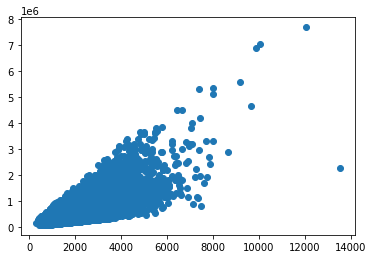

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [ ]:
#a)
#Your code:
plt.scatter(df['sqft_living'], df['price'])
plt.show()
#Hint plt.scatter

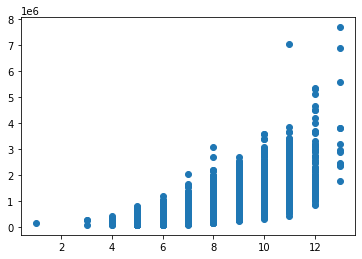

In [ ]:
#b)
#Your code:
# Check how price is influenced by apartment's grade
plt.scatter(df['grade'], df['price'])
plt.show()
#Find other variables correlated with price:
# bathrooms, sqft_living, grade, sqft_above, sqft_living15 all have at least 0.4 of correlation 

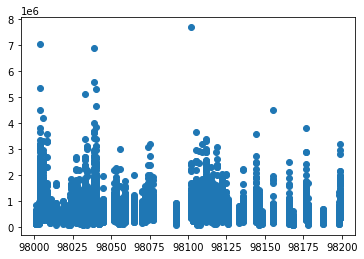

In [57]:
#c)
#Your code:
plt.scatter(df['zipcode'], df['price'])

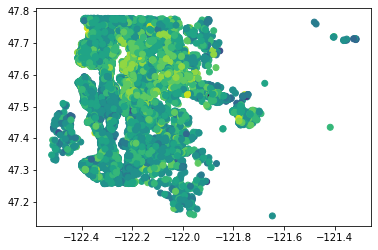

In [ ]:
#Your code:
plt.scatter(df['long'], df['lat'], c=df['grade'])
plt.show()


## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

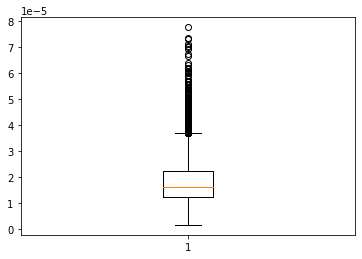

In [ ]:
#a)
#Your code:
plt.boxplot(df['grade']/df['price'])
plt.show()
#Compare with plot 2b)
#For this amount of data, the scatter plot is more readable. However, from the boxplot, we can easily read quartile values and the median.  
#Hint: plt.boxplot

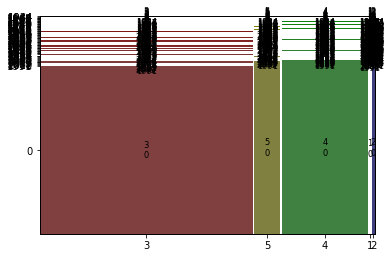

In [ ]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic_df = pd.DataFrame({'condition' : house_categorical_df['condition'], 'yr_renovated' : house_categorical_df['yr_renovated']}, index=range(len(house_categorical_df['condition'])))
mosaic(mosaic_df, ['condition', 'yr_renovated']) 
plt.show()


## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [ ]:
#a)
#Your code:
houses = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]
houses[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].describe()
#Hint: pandas.DataFrame.loc

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,5.144986e+05,1850.279221,23678.948052,1717.422078,132.857143,47.567376,-122.247091,1802.337662,17545.123377
std,2.497661e+05,547.585413,83324.024708,527.473851,248.092631,0.143221,0.150507,453.210930,40404.134611
min,2.090000e+05,1020.000000,700.000000,720.000000,0.000000,47.194700,-122.519000,850.000000,886.000000
25%,3.769750e+05,1452.500000,3414.750000,1402.500000,0.000000,47.498800,-122.361750,1452.500000,4020.000000
50%,4.640000e+05,1700.000000,5868.500000,1625.000000,0.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,5.894625e+05,2127.500000,10800.250000,1977.500000,207.500000,47.682400,-122.149250,2117.500000,10392.250000
max,1.755000e+06,3650.000000,843309.000000,3650.000000,1120.000000,47.777000,-121.709000,3170.000000,273992.000000


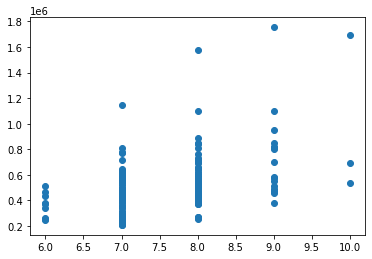

In [ ]:
#b)
#Your code:
distinct_houses = plt.scatter(houses['grade'], houses['price'])
plt.show()

In [ ]:
#c)
#Your code:
houses['ratio'] = houses['price']/houses['sqft_living']
best_price_to_sqft_df = houses.sort_values(by='ratio', ascending=True)
best_price_to_sqft_df.head()
#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ratio
9704,7452500565,20140829T000000,260000.0000,3,2.0000,2710,5000,2.0000,0,0,3,6,2710,0,1951,0,98126,47.5188,-122.3730,850,5000,95.9410
11258,7937600262,20140710T000000,379900.0000,3,2.0000,3110,44967,2.0000,0,0,3,9,3020,90,1999,0,98058,47.4343,-122.0820,2150,44967,122.1543
19880,3832050860,20150319T000000,210000.0000,3,2.0000,1580,4961,2.0000,0,0,3,7,1580,0,2006,0,98042,47.3338,-122.0530,2280,5000,132.9114
16014,5104450440,20141113T000000,252500.0000,3,2.0000,1810,10684,2.0000,0,0,3,8,1810,0,1987,0,98058,47.4619,-122.1530,2140,9657,139.5028
20906,3355400242,20141028T000000,274900.0000,3,2.0000,1936,6612,2.0000,0,0,3,7,1936,0,2014,0,98001,47.2602,-122.2460,1620,21600,141.9938
